In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [ ]:
# read in shape file with ZCTA for NYC
zip_code_map = gpd.read_file('C:\\Users\\abonc\\OneDrive\\Documents\\GitHub\\urban_data_project\\analysis\\shapefile\\Modified Zip Code Tabulation Areas (MODZCTA).zip')


In [ ]:
# read 311 calls csv file
df_311_calls = pd.read_csv('C:\\Users\\abonc\\OneDrive\\Documents\\GitHub\\urban_data_project\\inbound\\311\\nyc_zipcodes\\311_Service_Requests_from_2010_to_Present.csv')

In [12]:
# create dataframe for 311 calls for each year from 2011 to 2019

df_311_2011 = df_311_calls[df_311_calls['Created Date']==2011]
df_311_2012 = df_311_calls[df_311_calls['Created Date']==2012]
df_311_2013 = df_311_calls[df_311_calls['Created Date']==2013]
df_311_2014 = df_311_calls[df_311_calls['Created Date']==2014]
df_311_2015 = df_311_calls[df_311_calls['Created Date']==2015]
df_311_2016 = df_311_calls[df_311_calls['Created Date']==2016]
df_311_2017 = df_311_calls[df_311_calls['Created Date']==2017]
df_311_2018 = df_311_calls[df_311_calls['Created Date']==2018]
df_311_2019 = df_311_calls[df_311_calls['Created Date']==2019]

,Created Date,Incident Zip,Unique Key
22,2019,11104,6904
23,2019,11230,25142
24,2019,11377,20223
47,2019,11106,11236
77,2019,11717,1
...,...,...,...
8150,2019,11224,7169
8172,2019,89119,1
8174,2019,11946,1
8176,2019,11797,1


In [15]:
# add 311 complaints to geopandas zip code map - create map for each year

map_2011 = pd.merge(zip_code_map, df_311_2011, left_on='modzcta', right_on='Incident Zip', how='inner')
map_2012 = pd.merge(zip_code_map, df_311_2012, left_on='modzcta', right_on='Incident Zip', how='inner')
map_2013 = pd.merge(zip_code_map, df_311_2013, left_on='modzcta', right_on='Incident Zip', how='inner')
map_2014 = pd.merge(zip_code_map, df_311_2014, left_on='modzcta', right_on='Incident Zip', how='inner')
map_2015 = pd.merge(zip_code_map, df_311_2015, left_on='modzcta', right_on='Incident Zip', how='inner')
map_2016 = pd.merge(zip_code_map, df_311_2016, left_on='modzcta', right_on='Incident Zip', how='inner')
map_2017 = pd.merge(zip_code_map, df_311_2017, left_on='modzcta', right_on='Incident Zip', how='inner')
map_2018 = pd.merge(zip_code_map, df_311_2018, left_on='modzcta', right_on='Incident Zip', how='inner')
map_2019 = pd.merge(zip_code_map, df_311_2019, left_on='modzcta', right_on='Incident Zip', how='inner')

[Text(0.5, 1.0, '311 complaints by zip code in 2019')]

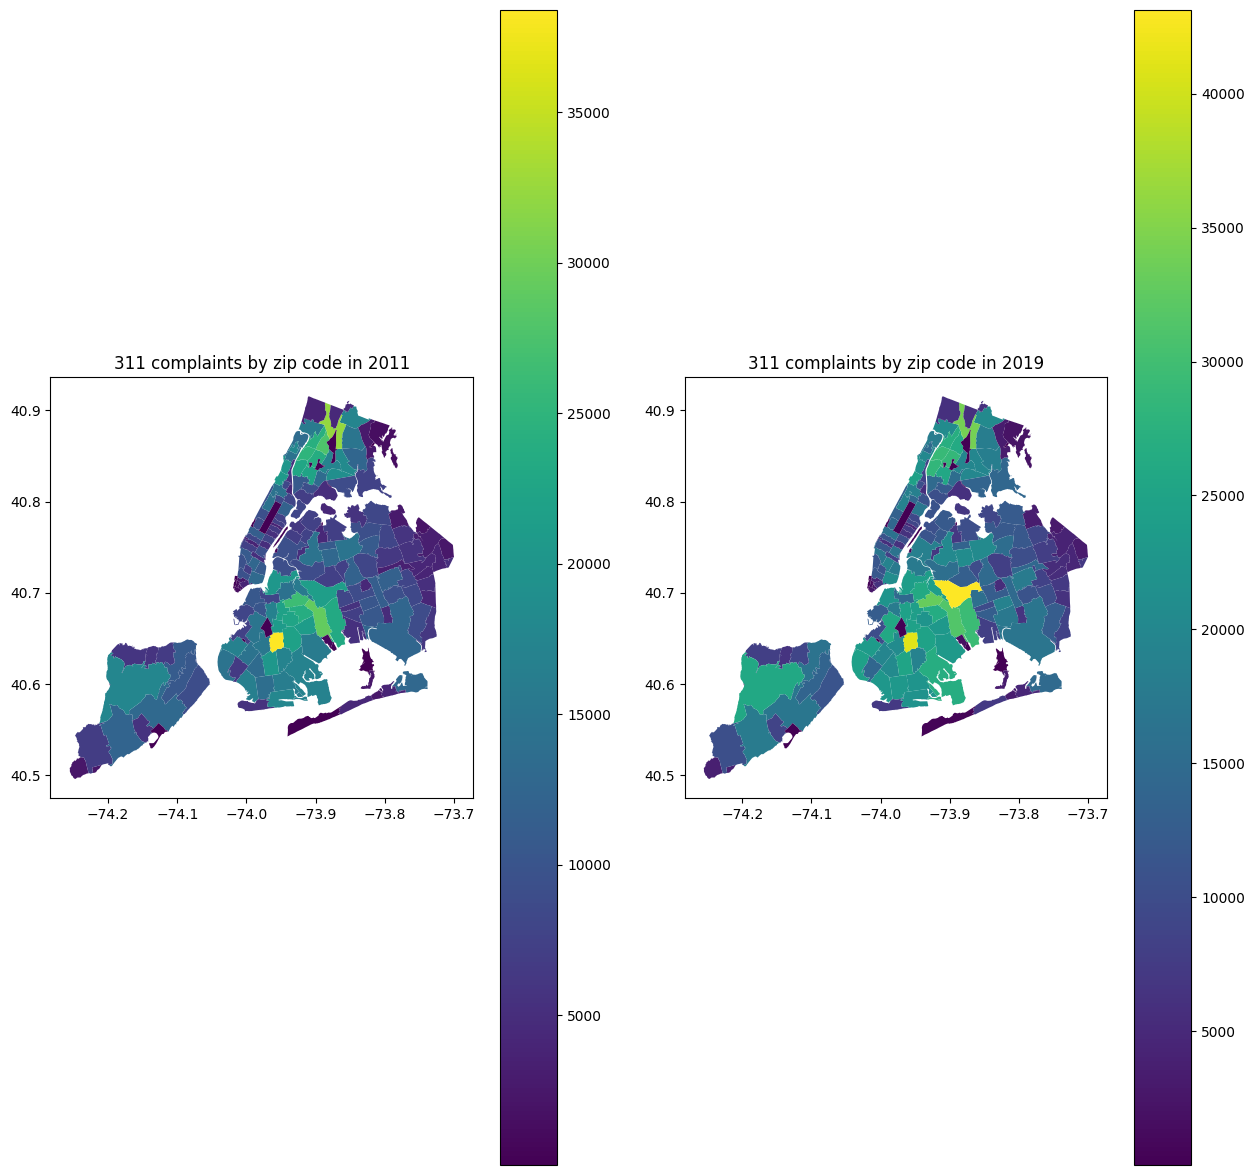

In [31]:
# plot 311 complaints for each zip code in 2011 and 2019

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=[15,15])

map_2011.plot(column='Unique Key',legend=True,ax=ax[0]).set(title='311 complaints by zip code in 2011')
map_2019.plot(column='Unique Key',legend=True,ax=ax[1]).set(title='311 complaints by zip code in 2019')